<center><img src="https://drive.google.com/uc?id=1Z3JvAFmL2IkBnQmmt5f4uTcXVhO5f7cq"/></center>

------
<center>&copy; Research Group CAMMA, University of Strasbourg, <a href="http://camma.u-strasbg.fr">http://camma.u-strasbg.fr</a> 

<h2>Author: Vinkle Srivastav </h2>
</center>

------

# <center><font color=green> Lecture 5: Introduction to PyTorch </font></center>
<center><img src="https://drive.google.com/uc?id=1PbX7zPDuS3BDQ2xw5HDS9oyXtQv0gbx2"/></center>

**Objectives**: 
  1. PyTorch tensors
  2. Autograd: automatic differentiation on tensors
  3. Linear regression using gradient descent with PyTorch tensors
 
Tensors are similar to NumPy’s ndarrays but can be used on a GPU for fast computation. In this tutorial, we will illustrate with examples some basic PyTorch tensors functions along with numpy counterpart. Then we will move on to `autograd` package of PyTorch to learn how to automatically compute the differentiation on the tensor operations. In the end,  we will make a 1D linear regression program using PyTorch tensors and autograd.

## Setup

In [ ]:
# install dependencies
# !pip install numpy
# !pip install matplotlib

## Imports

In [4]:
import numpy as np
import torch
import matplotlib.pyplot as plt
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dtype = torch.float32
print('using device={}, dtype={}, PyTorch version={}'.format(device, dtype, torch.__version__))

using device=cuda, dtype=torch.float32, PyTorch version=1.8.1+cu102


## 1. PyTorch tensors

### Tensor initialization

In [5]:
# construct a randomly initialized 4x5 matrix
# in torch
x = torch.rand(4,5)
print('torch:{}\n'.format(x))
# in numpy
xn = np.random.rand(4,5)
print('numpy:{}'.format(xn))

torch:tensor([[0.1836, 0.2901, 0.5500, 0.2061, 0.9955],
        [0.4411, 0.7678, 0.3023, 0.6846, 0.4842],
        [0.3802, 0.6258, 0.5328, 0.0968, 0.8530],
        [0.7872, 0.1405, 0.6257, 0.6428, 0.6226]])

numpy:[[0.63072136 0.93357894 0.57407951 0.55835629 0.25215537]
 [0.82874493 0.42529986 0.49448031 0.40845752 0.04934143]
 [0.81343739 0.93695628 0.21293733 0.69010511 0.94211314]
 [0.37805129 0.33450927 0.22306512 0.53186753 0.00273882]]


In [6]:
# construct a zero filled 4x5 matrix of dtype int
# in torch
x = torch.zeros(4,5, dtype=torch.int) # torch.float, torch.double, torch.long
print('torch:{}\n'.format(x))
# in numpy
xn = np.zeros((4,5), dtype=int)
print('numpy:{}'.format(xn))

torch:tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

numpy:[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


### Tensor attributes

In [8]:
x = torch.rand(2, 3, 4)
print("Shape of tensor: {}".format(x.shape))
print("Datatype of tensor: {}".format(x.dtype))
print("Device tensor is stored on: {}".format(x.device))

# transfer tensor to GPU
x = x.to(device)
print("Device tensor is stored on: {}".format(x.device))

Shape of tensor: torch.Size([2, 3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu
Device tensor is stored on: cuda:0


### Tensor operations

In [9]:
# numpy like indexing (0 based)
x = torch.randn(4, 5)
x_1r = x[0,:]
x_3c = x[:,2]
print('x: {}\n'.format(x))
print('x(1st row): {} \nsize:{}\n'.format(x_1r, x_1r.shape))
print('x(3rd column): {} \nsize:{}\n'.format(x_3c, x_3c.shape))

# Augument dimension
x_1r = x_1r.unsqueeze(0)
x_3c = x_3c.unsqueeze(1)
print('after')
print('x(1st row): {} \nsize:{}\n'.format(x_1r, x_1r.shape))
print('x(3rd column): {} \nsize:{}\n'.format(x_3c, x_3c.shape))

# to suppress the dimension use .squeeze(dim=N), numpy equivalent is expand_dims/squeeze

x: tensor([[-1.4092,  0.3426, -0.6453,  1.3111,  1.7677],
        [ 0.4812, -1.0298,  0.2474, -0.1997,  0.7130],
        [-0.0295, -0.2667,  0.1192, -1.5924,  2.1982],
        [-0.0638, -0.7273,  0.1387, -0.1187, -2.6472]])

x(1st row): tensor([-1.4092,  0.3426, -0.6453,  1.3111,  1.7677]) 
size:torch.Size([5])

x(3rd column): tensor([-0.6453,  0.2474,  0.1192,  0.1387]) 
size:torch.Size([4])

after
x(1st row): tensor([[-1.4092,  0.3426, -0.6453,  1.3111,  1.7677]]) 
size:torch.Size([1, 5])

x(3rd column): tensor([[-0.6453],
        [ 0.2474],
        [ 0.1192],
        [ 0.1387]]) 
size:torch.Size([4, 1])



In [11]:
# Matrix multiplication
x = torch.rand(3, 4)
y = torch.rand(4, 4)
# using operator opverloading
print('torch: x*y=', torch.mm(x,y)) # use x*y for pointwise multiplication

print('numpy: x*y=', np.dot(x.numpy(),y.numpy())) # use x*y for pointwise multiplication

torch: x*y= tensor([[1.1075, 1.1250, 1.1830, 1.0065],
        [1.1973, 1.4765, 1.2345, 1.3365],
        [0.6563, 0.8945, 0.6463, 0.7605]])
numpy: x*y= [[1.1074641  1.1249586  1.1829847  1.0064784 ]
 [1.1973499  1.4765333  1.234472   1.3365238 ]
 [0.65628636 0.8945031  0.6462992  0.76049745]]


In [12]:
# compute max value or max argument
x = torch.zeros(10)
x[4] = 1.0
print(x)
val, index = torch.max(x, 0)
print('max value of tensor is {} at index {}'.format(val, index))

x = torch.zeros(2, 10)
x[0,4] = 1.0
x[1,5] = 1.0
print('\n\n', x)
val, index = torch.max(x, 1)
print('max value of tensor is {} at index {}'.format(val, index))

tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])
max value of tensor is 1.0 at index 4


 tensor([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])
max value of tensor is tensor([1., 1.]) at index tensor([4, 5])


## 2. Autograd: automatic differentiation on tensors ops

<center><img src="https://drive.google.com/uc?id=1kCj60BIOGHfJJsGIL7KMbQho2oC15iVX"/></center>


Autograd provides automatic differentiation to all the Tensors operations. Use `requires_grad=True` to start recording of tensor operations. All the subsequent operations will contain `grad_fn` as shown below

In [15]:
x = torch.ones(2,2, device=device, requires_grad=True)
# Enable existing tensor to support automatic differentiation using the code below
# x.requires_grad_()
print(x)
print(x**2)   # see the grad_fn
print(x/2)    # see the grad_fn

tensor([[1., 1.],
        [1., 1.]], device='cuda:0', requires_grad=True)
tensor([[1., 1.],
        [1., 1.]], device='cuda:0', grad_fn=<PowBackward0>)
tensor([[0.5000, 0.5000],
        [0.5000, 0.5000]], device='cuda:0', grad_fn=<DivBackward0>)


In [18]:
x = torch.ones(2,2, device=device, requires_grad=True)
print('x:  {}\n'.format(x))
# all the subsequent operations on the tensors will have grad_fn
y = 2*x + 4 
print('y:  {}\n'.format(y))
z = y * y * 4
print('z:  {}\n'.format(z))
out = z.mean()
print('out:  {}\n'.format(out))

x:  tensor([[1., 1.],
        [1., 1.]], device='cuda:0', requires_grad=True)

y:  tensor([[6., 6.],
        [6., 6.]], device='cuda:0', grad_fn=<AddBackward0>)

z:  tensor([[144., 144.],
        [144., 144.]], device='cuda:0', grad_fn=<MulBackward0>)

out:  144.0



This is equivalent to **forward pass** as shown below
#### $$ x = 
\begin{bmatrix} 
1.0 & 1.0 \\
1.0 & 1.0 
\end{bmatrix} $$
#### $$  y = x + 2 $$
#### $$  z = 4*y^2$$
#### $$ out =  \frac{1}{4}\sum_i z_i $$

To compute the backward pass use `.backward()` on the tensor. It will compute the backward pass and store the gradient on the leaf variable

**Backward Pass**
#### $$ \frac{\partial out}{\partial x_i} = \frac{\partial out}{\partial z_i} . \frac{\partial z_i}{\partial y_i} .\frac{\partial y_i}{\partial x_i} $$ 
#### $$ \frac{\partial out}{\partial z_i} = \frac{1}{4} . 1$$
#### $$ \frac{\partial z_i}{\partial y_i} = 8 . y_i$$
#### $$ \frac{\partial y_i}{\partial x_i} = 1 $$
#### $$ \frac{\partial out}{\partial x_i} = \frac{1}{4} . 8 . y_i . 1$$
#### $$ \frac{\partial out}{\partial x_i} = \frac{1}{4} . 8 . \begin{bmatrix} 
3.0 & 3.0 \\
3.0 & 3.0 
\end{bmatrix} $$
#### $$ \frac{\partial out}{\partial x_i} = \begin{bmatrix} 
6.0 & 6.0 \\
6.0 & 6.0 
\end{bmatrix} $$

In [19]:
out.backward()
print(x.grad.data)

tensor([[24., 24.],
        [24., 24.]], device='cuda:0')


## Linear regression using PyTorch tensors

Let's assume training dataset is generated using the following equation:  $  y = sin(10x) + 0.15((10x)^2) + \mathcal{N}(0,\,1) $

x shape = torch.Size([500, 1]), y shape = torch.Size([500, 1])


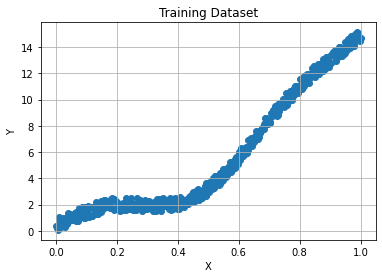

In [20]:
# training dataset
num_training_points = 500
x = torch.linspace(0.0, 1, num_training_points, device=device, dtype=dtype)[..., None]
y = torch.sin(x*10) + 0.15 * ((x*10) ** 2) + torch.rand(num_training_points,1).to(device)
print("x shape = {}, y shape = {}".format(x.shape, y.shape))
# plot the training dataset
plt.scatter(x.cpu().numpy(), y.cpu().numpy())
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.title('Training Dataset')
plt.show()

## Gradient descent
Suppose we are given list of $x,y$ points as shown in the above graph. We are going to fit a 1D line using gradient descent algorithm.
        
Define 1D Model: $\bar{\mathbf{y}}$ and $\mathbf{x}$ are vectot of size N. $w$ and $b$ are learnable scalar parameters.
#### $$  \bar{\mathbf{y}} = w*\mathbf{x} + b $$
**error vector**        
#### $$  e = \bar{y} - y $$
**loss value**        
#### $$  loss = \frac{\sum_i e_i^2}{N} $$
**Gradient**
#### $$ \frac{\partial loss}{\partial w} = \frac{\partial (\frac{\sum_i e_i^2}{N})}{\partial w} =\frac{2}{N}*\sum_i e_i * \frac{ \partial  [( w * \mathbf{x_i} + b) - y_i]}{\partial w} = \frac{2}{N}*\sum_i e_i * x_i$$
#### $$ \frac{\partial loss}{\partial b} = \frac{\partial (\frac{\sum_i e_i^2}{N})}{\partial b} =\frac{2}{N}*\sum_i e_i * \frac{ \partial  [( w * \mathbf{x_i} + b) - y_i]}{\partial b} = \frac{2}{N}*\sum_i e_i * 1  = \frac{2}{N}*\sum_i e_i$$
**Paramter update for each iteration**
#### $$ w = w - (lerning\_rate * \frac{\partial loss}{\partial w})$$
#### $$ b = b - (lerning\_rate * \frac{\partial loss}{\partial b})$$

### 1D regresion using PyTorch tensors

The following will show how to do the forward and backward pass inside the while loop using PyTorch tensors. Once we have learned the parameters, we will plot the fitted line on the training data.

data(x)= torch.Size([500, 2]) torch.float32
label(y)= torch.Size([500, 1]) torch.float32
Iteration: 10 - loss: 11.5283
Iteration: 20 - loss: 6.6320
Iteration: 30 - loss: 5.3823
Iteration: 40 - loss: 5.0634
Iteration: 50 - loss: 4.9820
Iteration: 60 - loss: 4.9612
Iteration: 70 - loss: 4.9559
Iteration: 80 - loss: 4.9545
Iteration: 90 - loss: 4.9542
Iteration: 100 - loss: 4.9541
Iteration: 110 - loss: 4.9541
Iteration: 120 - loss: 4.9541
Iteration: 130 - loss: 4.9541
Iteration: 140 - loss: 4.9541
Iteration: 150 - loss: 4.9541
Iteration: 160 - loss: 4.9541
Iteration: 170 - loss: 4.9541
Iteration: 180 - loss: 4.9541
Iteration: 190 - loss: 4.9541
Iteration: 200 - loss: 4.9541


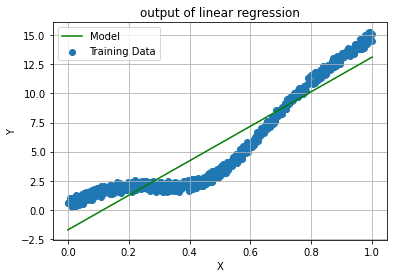

In [21]:
num_training_points = 500
x = torch.linspace(0.0, 1, num_training_points, device=device, dtype=dtype)[..., None]
y = torch.sin(x*10) + 0.15 * ((x*10) ** 2) + torch.rand(num_training_points,1).to(device)
y = y.float()
x = torch.cat((torch.ones_like(x), x), 1)

#y = y.float().to(device)
print('data(x)=', x.shape, x.dtype)
print('label(y)=', y.shape, y.dtype)
#x = x.unsqueeze(1)
#x = torch.cat((torch.ones_like(x), x), 1)

lr = torch.tensor(0.5, device=device, dtype=dtype)
niterations=200
citer = 1
print_every = 10
w = torch.randn(1, 2).to(device).float()
loss = 0
#%% Learning iterations
while citer <= niterations:
    ## forward propagation
    yhat = x.mm(w.t())
    ## backward propagation: compute the error vector and loss term
    error = yhat - y
    ## compute the gradient + update the parameters
    loss = (2.0 / len(x)) * torch.sum(error **2)
    # gradient
    grad = (2.0 / len(x)) * error.t().mm(x)
    # parameter update
    w = w - (lr * grad)
    # update the iteration count
    if citer % print_every == 0:
        print("Iteration: %d - loss: %.4f" %(citer, loss))
    citer += 1
    
plt.plot(x[:,1].cpu().numpy(), x.mm(w.t()).cpu().numpy(), c='g', label='Model')
plt.scatter(x[:,1].cpu().numpy(), y.cpu().numpy(), label='Training Data')
plt.grid()
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('output of linear regression')
plt.show()

## 1D regresion  using PyTorch tensors and autograd

The following will show how to do the forward and backward pass inside the while loop using PyTorch tensors and autograd. Once we have learned the parameters, we will plot the fitted line on the training data.

Iteration: 10 - loss: 19.5074
Iteration: 20 - loss: 13.3932
Iteration: 30 - loss: 9.8129
Iteration: 40 - loss: 7.7162
Iteration: 50 - loss: 6.4884
Iteration: 60 - loss: 5.7694
Iteration: 70 - loss: 5.3483
Iteration: 80 - loss: 5.1017
Iteration: 90 - loss: 4.9573
Iteration: 100 - loss: 4.8728
Iteration: 110 - loss: 4.8233
Iteration: 120 - loss: 4.7943
Iteration: 130 - loss: 4.7773
Iteration: 140 - loss: 4.7673
Iteration: 150 - loss: 4.7615
Iteration: 160 - loss: 4.7581
Iteration: 170 - loss: 4.7561
Iteration: 180 - loss: 4.7549
Iteration: 190 - loss: 4.7543
Iteration: 200 - loss: 4.7539


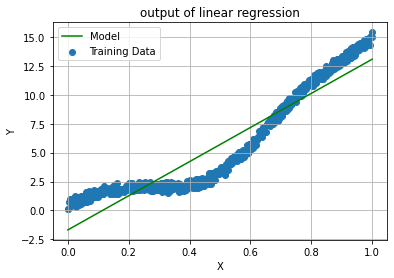

In [22]:
x = torch.linspace(0.0, 1, num_training_points, device=device, dtype=dtype)
x = x.unsqueeze(1)
y = torch.sin(x*10) + 0.15 * ((x*10) ** 2) + torch.rand(num_training_points,1).to(device)
y = y.float()
x = torch.cat((torch.ones_like(x), x), 1)

lr = torch.tensor(0.1, device=device, dtype=dtype)
niterations=200
citer = 1
print_every = 10
w = torch.randn(1, 2, requires_grad=True, device=device) # see requires_grad=True
loss = 0
#%% Learning iterations
while citer <= niterations:
    ## forward propagation
    yhat = x.mm(w.t())
    ## backward propagation: compute the error vector and loss term
    error = yhat - y
    loss = (2.0 / len(x)) * torch.sum(error **2)
    loss.backward()
    ## compute the gradient + backpropagate
    # parameter update
    with torch.no_grad():
        w -= lr * w.grad
        w.grad.zero_()    
        
    # update the iteration count
    if citer % print_every == 0:
        print("Iteration: %d - loss: %.4f" %(citer, loss))
    citer += 1
    
plt.plot(x[:,1].cpu().numpy(), x.mm(w.t()).cpu().detach().numpy(), c='g', label='Model')
plt.scatter(x[:,1].cpu().numpy(), y.cpu().numpy(), label='Training Data')
plt.grid()
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('output of linear regression')
plt.show()